# Exploratory Data Analysis & Visualization

<p style="text-align: center; font-size:30px;">Data Dictionary</p>

|     **Variable**       | **Definition**        |**Key**                        |
|----------------|-------------------------------|-----------------------------|
|survival|Survival | 0 = NO, 1 = YES|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd
|name|Name||
sex|Sex||
Age|Age in years||
sibsp|# of siblings / spouses aboard the Titanic||
parch|# of parents / children aboard the Titanic||
ticket|Ticket number||
fare|Passenger fare||
cabin|Cabin number||
embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|


The visualizations have a purpose - they're helping you to discover & understand your data.

Let's start by importing the libraries and setting some parameters

## **Import Libraries**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.lines as lines
import seaborn as sns

#PARAMETERS

plt.rcParams["font.family"] = "serif"
plt.rcParams['figure.dpi'] = 120
#plt.rcParams['axes.facecolor'] = (0,0,0,0)
background_color='#F5F4EF'
colors = ['#4A4A4A','#BCCCE6','#6D8DB4','#376A98','#1E294C']
color_text = '#202020'

import warnings
warnings.filterwarnings("ignore")

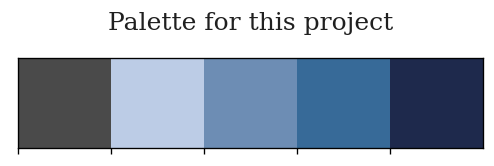

In [2]:
fig = sns.palplot(colors)
plt.title("Palette for this project",loc='center',fontsize=15,y=1.2, color= color_text)
plt.show()

## **Import Dataset**

In [3]:
df = pd.read_csv("../data/raw/train.csv")

## **Data Check**

Before starting to analyze the data, let's check some important information about the dataset
* DataFrame Shape: Rows and columns
* Column names
* Missing data
* Data Types
* Data Describe - Descriptive statistics

In [4]:
def data_check():
    print('DataFrame Shape: \n',df.shape[0], 'Rows\n',df.shape[1],' Columns')
    print('---------------------------------------------------------------------------------------------')
    print('Column Headers: \n',list(df.columns))
    print('---------------------------------------------------------------------------------------------')
    print('Missing Values: \n',df.isnull().sum()/len(df))
    print('---------------------------------------------------------------------------------------------')
    print('Data Types:\n',df.dtypes)
    print('---------------------------------------------------------------------------------------------')
    print('Data Describe:\n',df.describe())     

In [5]:
data_check()

DataFrame Shape: 
 891 Rows
 12  Columns
---------------------------------------------------------------------------------------------
Column Headers: 
 ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
---------------------------------------------------------------------------------------------
Missing Values: 
 PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64
---------------------------------------------------------------------------------------------
Data Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
F

## Overview
* Cabin has 77% of missing values - this variable is not important to the model because it has many missing values
* analyzing the data distribution, we couldn't detect any outliers

<p style="text-align: center; font-size:30px;">Varible Types</p>
<p style="text-align: center; font-size:20px;">Quantitative</p>

|     **Variable**       | **type**        |
|----------------|-------------------------------|
|PassengerId|Discrete|
|Age|Continuous|
sibsp|Discrete|
parch|Discrete| 
fare|Continuous|

<p style="text-align: center; font-size:20px;">Quanlitative</p>

|     **Variable**       | **type**        |
|----------------|-------------------------------|
|survival|Nominal|
|pclass|Ordinal|
|Name|Nominal|
ticket|Nominal| 
|cabin|Nominal|
|embarked|Nominal|

# **Target analyze ( Survival )**

In [6]:
Survivedrate = pd.DataFrame(round((df.groupby(['Survived'])['Survived'].count()/len(df)),3)).T

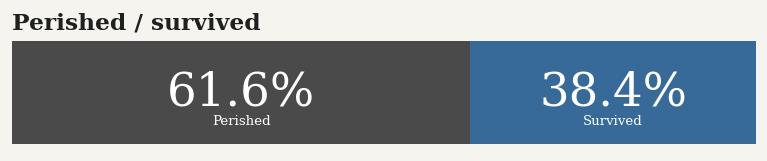

In [7]:
# Plot
fig, ax = plt.subplots(1,1, figsize=(8,1.25), facecolor=background_color)

ax.barh(Survivedrate.index, Survivedrate[0], color=colors[0])
ax.barh(Survivedrate.index, Survivedrate[1], left=Survivedrate[0], color=colors[3])

ax.set(facecolor=background_color, xlim=[0,1], xticks=[], yticks=[])

for s in ["top","right","left","bottom"]:
            ax.spines[s].set_visible(False)

# Annotations
for i in Survivedrate.index:
    ax.annotate(f"{(Survivedrate[0][i]*100)}%", xy=(Survivedrate[0][i]/2, i),
                   va = 'center', ha='center',fontsize=28,color='white')
    ax.annotate(f"{(Survivedrate[1][i]*100)}%", xy=(Survivedrate[0][i]+Survivedrate[1][i]/2, i),
                   va = 'center', ha='center',fontsize=28, color='white')
    ax.annotate("Perished", xy=(Survivedrate[0][i]/2, -0.22),
                   va = 'center', ha='center',fontsize=8, color='white')
    ax.annotate("Survived", xy=(Survivedrate[0][i]+Survivedrate[1][i]/2, -0.22),
                   va = 'center', ha='center',fontsize=8, color='white')

ax.text(0,0.5, "Perished / survived", fontsize=14, fontweight='bold', color=color_text)

plt.show()

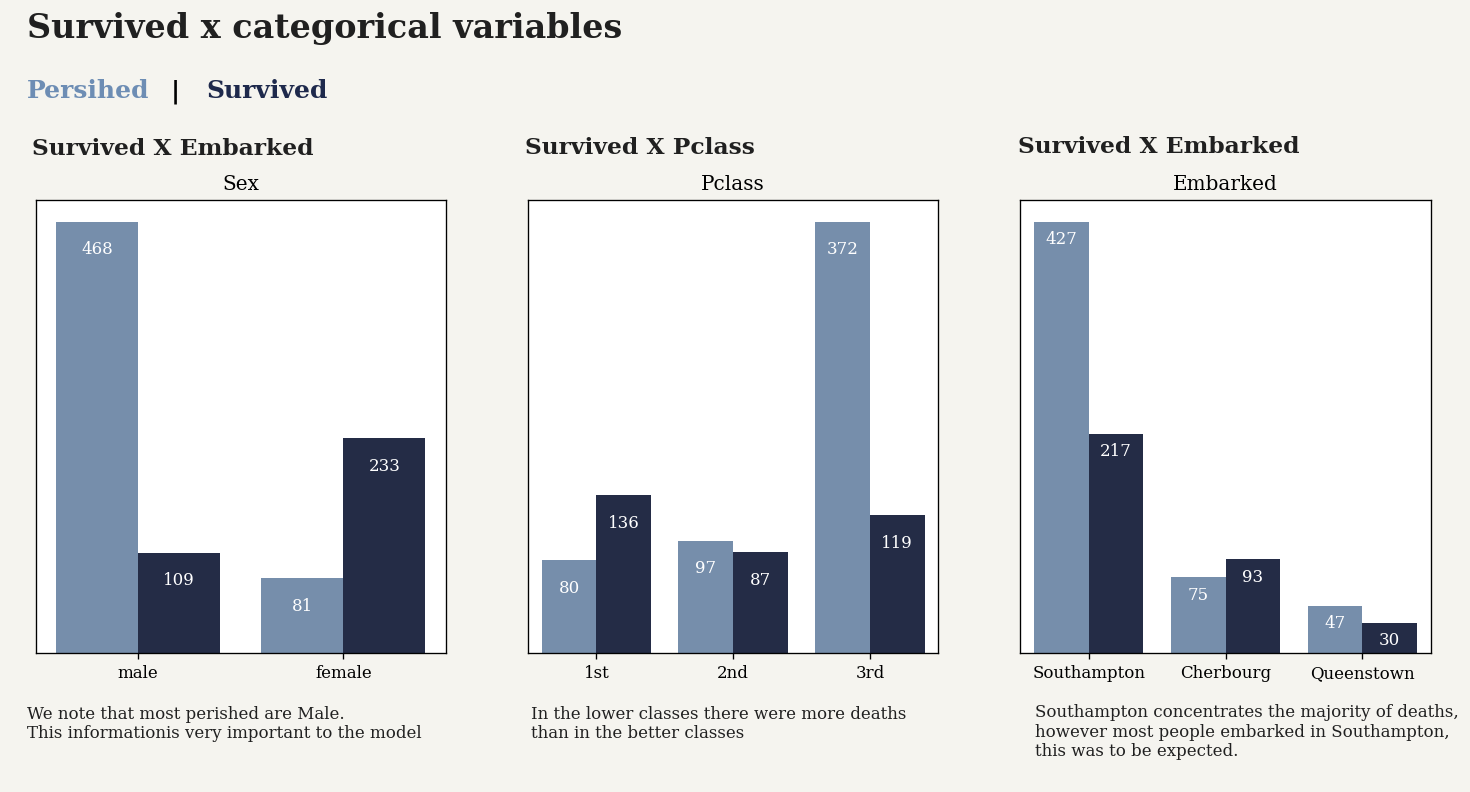

In [176]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), facecolor=background_color)

sns.countplot('Sex',hue='Survived',data=df, palette = [colors[2], colors[4]],ax=ax1)
sns.countplot('Pclass',hue='Survived',data=df, palette = [colors[2], colors[4]],ax=ax2)
sns.countplot('Embarked',hue='Survived',data=df, palette = [colors[2], colors[4]],ax=ax3)

#ax1
ax1.set(yticks=[])
ax1.set_xlabel(" ",loc='left')
ax1.set_ylabel(" ",loc='top')
ax1.set_title('Sex')
ax1.get_legend().remove()
for p in ax1.patches:
    ax1.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)
ax1.text(-0.52,540, "Survived X Embarked", fontsize=14, fontweight='bold', color=color_text)

#ax2
ax2.set(yticks=[])
ax2.set_xlabel(" ",loc='left')
ax2.set_ylabel(" ",loc='top')
ax2.set_title('Pclass')
ax2.set_xticklabels(['1st','2nd','3rd'])
ax2.get_legend().remove()
for p in ax2.patches:
    ax2.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)
ax2.text(-0.52,430, "Survived X Pclass", fontsize=14, fontweight='bold', color=color_text)

#ax3
ax3.set(yticks=[])
ax3.set_xlabel(" ",loc='left')
ax3.set_ylabel(" ",loc='top')
ax3.set_title('Embarked')
ax3.set_xticklabels(['Southampton','Cherbourg','Queenstown'])
ax3.get_legend().remove()
for p in ax3.patches:
    ax3.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+10), ha='center', va='top', color='white', size=10)
ax3.text(-0.52,495, "Survived X Embarked", fontsize=14, fontweight='bold', color=color_text)

#insight

fig.text(0.12,1.15, 'Survived x categorical variables',fontsize=20, fontweight='bold', fontfamily='serif',color=color_text)

fig.text(0.12,1.05,'Persihed',fontsize=15,fontweight='bold',color=colors[2])
fig.text(0.20,1.05,'|',fontsize=15,fontweight='bold',color='black')
fig.text(0.22,1.05,'Survived',fontsize=15,fontweight='bold',color=colors[4])

fig.text(0.12, -0.05, '''
We note that most perished are Male. 
This informationis very important to the model
'''
, fontsize=10, fontweight='light', fontfamily='serif',color=color_text)


fig.text(0.40, -0.05, '''
In the lower classes there were more deaths 
than in the better classes
'''
, fontsize=10, fontweight='light', fontfamily='serif',color=color_text)

fig.text(0.68, -0.08, '''

Southampton concentrates the majority of deaths,
however most people embarked in Southampton,
this was to be expected.
'''
, fontsize=10, fontweight='light', fontfamily='serif',color=color_text)

plt.show()


Text(0.12, 1, 'Numeric varible distribution')

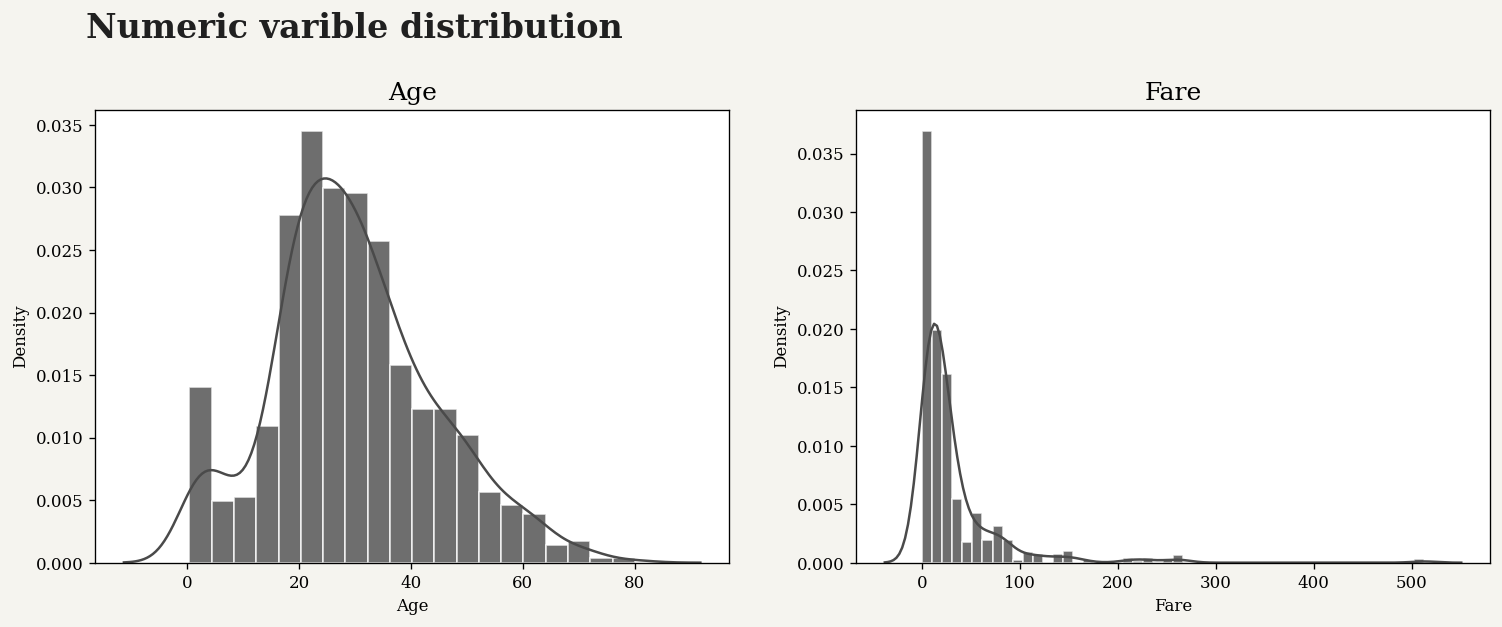

In [175]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), facecolor=background_color)

sns.distplot(df["Age"],color=colors[0],hist_kws=dict(edgecolor="white", linewidth=1,alpha=0.8),ax=ax1)
sns.distplot(df["Fare"],color=colors[0],hist_kws=dict(edgecolor="white", linewidth=1,alpha=0.8),ax=ax2)

ax1.set_title("Age", fontsize=15)
ax2.set_title("Fare", fontsize=15)
fig.text(0.12,1, 'Numeric varible distribution',fontsize=20, fontweight='bold', fontfamily='serif',color=color_text)
#fig.text(0.12,0.97, 'Numeric varible distribution',fontsize=17, fontweight='light', fontfamily='serif',color=color_text)